## This script contains the following:

### 1. Importing libraries and data and renaming columns

### 2. Standadizing the data

### 3. The elbow technique

### 4. k-means clustering

### 1. Importing libraries and data and renaming columns

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [4]:
# Ensuring the charts created are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [5]:
path = r'/Users/stadtsalat/Documents/Boat Sales'

In [6]:
# Importing the latest data set
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_6_3.csv'))

In [7]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Views last 7 days,Price_in_Euro,Country,City,Pricing Category
0,0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,226,3370,Switzerland,Lake Geneva,Low price
1,1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490,Germany,Bnningstedt,Low price
2,2,3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,64,3367,Denmark,Svendborg,Low price
3,3,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399,Germany,Bayern,Low price
4,4,6,Catamaran,Unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,3636,Switzerland,Neuenburgersee,Low price


#### Data Cleaning

In [8]:
# Dropping the redundant columns
df1 = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis = 1)

In [9]:
# Keeping the columns with only numerical variables
df = df1[['Length','Width','Views last 7 days','Price_in_Euro']]

In [10]:
df.head()

,Length,Width,Views last 7 days,Price_in_Euro
0,4.00,1.90,226,3370
1,4.00,1.50,75,3490
2,3.00,1.00,64,3367
3,3.55,1.46,58,3399
4,6.20,2.38,474,3636


In [11]:
df.shape

(9241, 4)

### 2. Standadizing the data


In [12]:
# standazing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
print(standardized_data)

[[-1.28684193 -1.36365653  0.48713069 -0.31808135]
 [-1.28684193 -1.69372949 -0.48644485 -0.31795309]
 [-1.45359497 -2.10632068 -0.55736757 -0.31808455]
 ...
 [-1.22014071 -1.44617477  1.31241327 -0.31687463]
 [-1.2251433  -1.37190836  0.7450315  -0.31708733]
 [-1.35354314 -1.61121125  0.28081005 -0.31760358]]


In [13]:
# coverting to dataframe
df = pd.DataFrame(standardized_data, columns=df.columns)
print(df)

        Length     Width  Views last 7 days  Price_in_Euro
0    -1.286842 -1.363657           0.487131      -0.318081
1    -1.286842 -1.693729          -0.486445      -0.317953
2    -1.453595 -2.106321          -0.557368      -0.318085
3    -1.361881 -1.726737          -0.596053      -0.318050
4    -0.919985 -0.967569           2.086116      -0.317797
...        ...       ...                ...            ...
9236 -0.953336 -1.594708           0.886877      -0.316340
9237 -0.903310 -0.918058           6.225424      -0.316394
9238 -1.220141 -1.446175           1.312413      -0.316875
9239 -1.225143 -1.371908           0.745031      -0.317087
9240 -1.353543 -1.611211           0.280810      -0.317604

[9241 rows x 4 columns]


### 3. The elbow technique


In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-36964.000000000044,
 -25233.020796137767,
 -19000.279427183166,
 -14568.50718381707,
 -11589.063003925698,
 -10000.897240654287,
 -8490.926425199035,
 -7646.694254959528,
 -6931.318667525381]

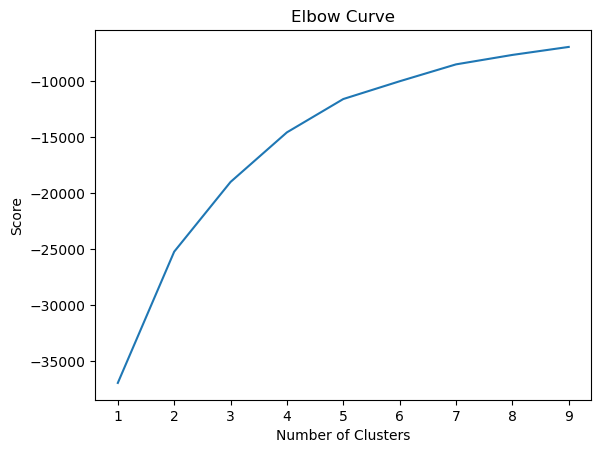

In [16]:
# Plotting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The graph on the x-axis shows a clear line of delineation after five, indicating that the ideal number of clusters for our data is five. 

In [17]:
### 4. k-means clustering

In [18]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [19]:
# Fitting the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=5)

In [20]:
df['clusters'] = kmeans.fit_predict(df)

In [21]:
df.head()

,Length,Width,Views last 7 days,Price_in_Euro,clusters
0,-1.286842,-1.363657,0.487131,-0.318081,3
1,-1.286842,-1.693729,-0.486445,-0.317953,3
2,-1.453595,-2.106321,-0.557368,-0.318085,3
3,-1.361881,-1.726737,-0.596053,-0.318050,3
4,-0.919985,-0.967569,2.086116,-0.317797,1


In [22]:
df['clusters'].value_counts()

3    4266
0    3580
2     928
1     400
4      67
Name: clusters, dtype: int64

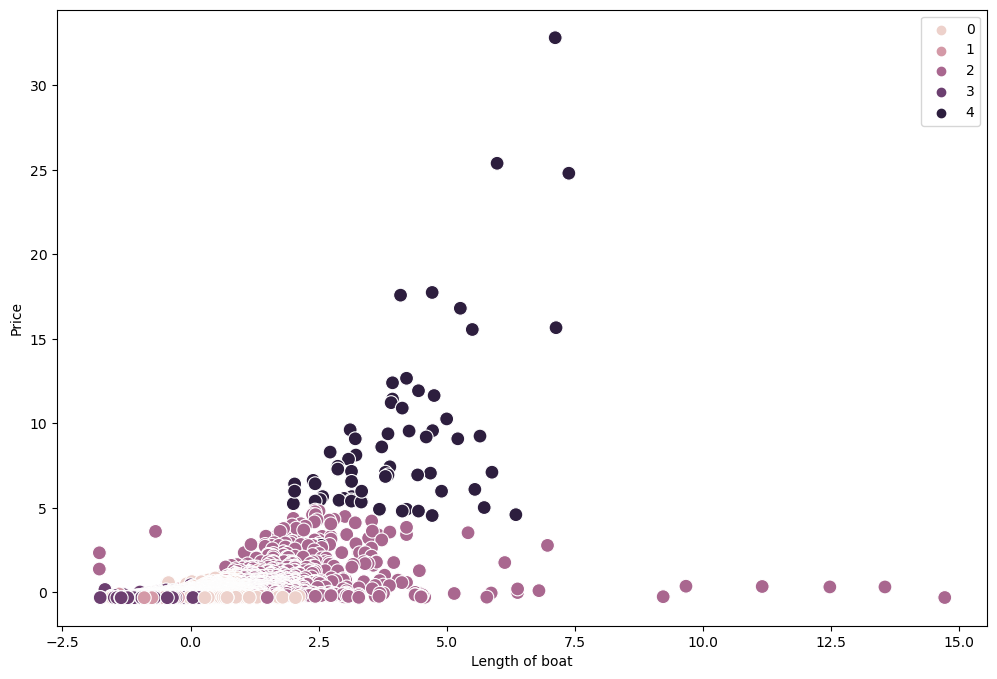

In [23]:
# Plotting the clusters for the "EUR_price" and "Length" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Length'], y=df['Price_in_Euro'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length of boat') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

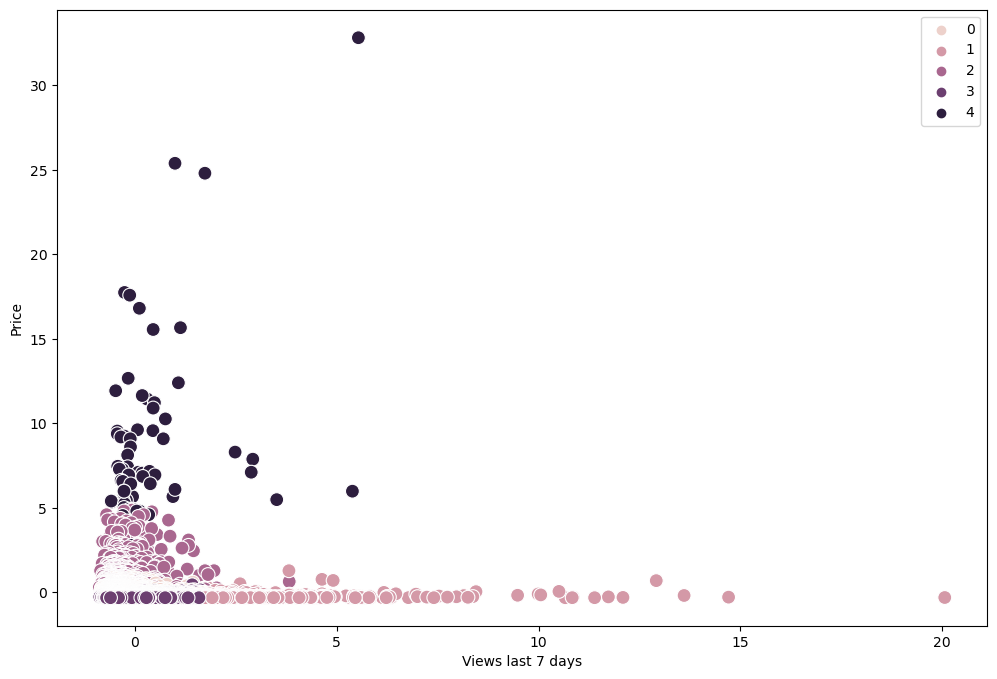

In [24]:
# Plotting the clusters for the "7days_views" and "EUR_price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Views last 7 days'], y=df['Price_in_Euro'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Views last 7 days') 
plt.ylabel('Price') 
plt.show()

The two graphs do not provide a clear indication of the correlation between the cost of a boat and its length or the number of views. This suggests that other key factors must also be taken into consideration when determining the value of a boat, such as the type of materials used, the craftsmanship, the age of the boat, the condition of the boat, any accessories or features included, and the current market value.

In [25]:
df.loc[df['clusters'] == 4, 'cluster'] = 'Black'
df.loc[df['clusters'] == 3, 'cluster'] = 'Dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'Purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'Pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'Light pink'

In [26]:
df.groupby('cluster').agg({'Length':['mean', 'median'], 
                         'Width':['mean', 'median'], 
                         'Views last 7 days':['mean', 'median'],
                          'Price_in_Euro':['mean', 'median']})

Length               Width           Views last 7 days  \
                 mean    median      mean    median              mean   
cluster                                                                 
Black        3.994252  3.854154  3.608868  3.183098          0.380314   
Dark purple -0.672717 -0.686531 -0.761898 -0.827288         -0.015285   
Light pink   0.287987  0.248954  0.448313  0.451745         -0.289970   
Pink        -0.547080 -0.669856 -0.599352 -0.794281          3.405214   
Purple       1.928915  1.714713  1.770738  1.607000         -0.306324   

                      Price_in_Euro            
               median          mean    median  
cluster                                        
Black       -0.086699      8.910977  7.106726  
Dark purple -0.151174     -0.253186 -0.270379  
Light pink  -0.389732     -0.066236 -0.119673  
Pink         2.734091     -0.236482 -0.281869  
Purple      -0.428417      0.877987  0.597001

Despite the data not showing a significant relationship between the columns, a dark purple cluster was identified that had the highest mean and median values for length, width, and price. 
This could suggest that the size of the boat, as indicated by its length and width, is positively correlated with the price of the boat. However, there are other important factors to consider when assessing the market value of a boat, such as the materials used, the craftsmanship, the age of the boat, the condition of the boat, any accessories or features included, and the current market value.

In [28]:
# Exporting the latest df
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'clusters1.csv'))